In [2]:
import numpy
import librosa
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, rfft, fftshift

win_length = 256

# Voibis_windows

In [ ]:
from window_function import Voibis_windows

Voibis = Voibis_windows(win_length)
plt.plot(Voibis)
plt.show()

# Rectangle_windows

In [ ]:
from window_function import Rectangle_windows

Rectangle = Rectangle_windows(win_length)
plt.plot(Rectangle)
plt.show()

# hanning_window

In [ ]:
hanning = np.hanning(win_length)

plt.plot(hanning)
plt.show()

# frequency response
plt.figure()
A = rfft(hanning, 512) / (win_length / 2)  # (512,)
mag = np.abs(A)
freq = np.linspace(0, 0.5, len(A))
with np.errstate(divide='ignore', invalid='ignore'):
    response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
plt.plot(freq, response)
plt.title("Frequency response of the Hann window")
plt.ylabel("win_lengthagnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.tight_layout()
plt.show()

# hamming_window

In [ ]:
hamming = np.hamming(win_length)
plt.plot(hamming)
plt.show()

# blackman_window

In [ ]:
blackman = np.blackman(win_length)
plt.plot(blackman)
plt.show()

# bartlett_window

In [ ]:
bartlett = np.bartlett(win_length)
plt.plot(bartlett)
plt.show()

# kaiser_window

In [ ]:
kaiser = np.kaiser(win_length,14)
plt.plot(kaiser)
plt.show()

# Orka前馈窗

In [ ]:
def Orka_forward_window(N1=64, N2=448, hop_size=64, NFFT=512):
    analysisWindow = np.zeros(NFFT)
    for n in range(NFFT):
        if n < N1:
            analysisWindow[n] = np.sin(n * np.pi / (2 * N1)) ** 2
        elif N1 <= n <= N2:
            analysisWindow[n] = 1
        elif N2 < n <= N2 + hop_size:
            analysisWindow[n] = np.sin(np.pi * (N2 + hop_size - n) / (2 * hop_size))

    return analysisWindow

Orka_forward = Orka_forward_window()
plt.plot(Orka_forward)
plt.show()

# Orka反馈窗

In [ ]:
def Orka_backward_window(N1=64, N2=448, hop_size=64, NFFT=512):
    synthesisWindow = np.zeros(NFFT)
    for n in range(NFFT):
        if n < N2 - hop_size:
            synthesisWindow[n] = 0
        elif N2 - hop_size <= n <= N2:
            synthesisWindow[n] = np.cos(np.pi * (n - N2) / (2 * hop_size)) ** 2
        elif N2 < n <= N2 + hop_size:
            synthesisWindow[n] = np.sin(np.pi * (N2 + hop_size - n) / (2 * hop_size))
    return synthesisWindow

Orka_backward = Orka_backward_window()
plt.plot(Orka_backward)
plt.show()

# 非对称 sqrt hann窗

In [ ]:
def getAsqrtAnalysisWindow(NFFT, hop_size, d=0):
    risingSqrtHann = np.sqrt(np.hanning(2 * (NFFT - hop_size - d) + 1)[:(NFFT - hop_size - d)])
    fallingSqrtHann = np.sqrt(np.hanning(2 * hop_size + 1)[:2 * hop_size])

    window = np.zeros(NFFT)
    window[:d] = 0
    window[d:NFFT - hop_size] = risingSqrtHann[:NFFT - hop_size - d]
    window[NFFT - hop_size:] = fallingSqrtHann[-hop_size:]

    return window
sqrt_hann = getAsqrtAnalysisWindow(NFFT=128, hop_size=32, d=0)
plt.plot(sqrt_hann)
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(Rectangle, label="Rectangle")
plt.plot(hanning, label="hanning")
plt.plot(hamming, label="hamming")
plt.plot(Voibis, label="Voibis")
plt.plot(blackman, label="blackman")
plt.plot(bartlett, label="bartlett")
plt.plot(kaiser, label="kaiser")
plt.plot(Orka_forward,label="Orka_forward")
plt.plot(Orka_backward,label="Orka_backward")

plt.legend(fontsize=15,)
plt.tight_layout()
plt.show()

# RNNoise_window

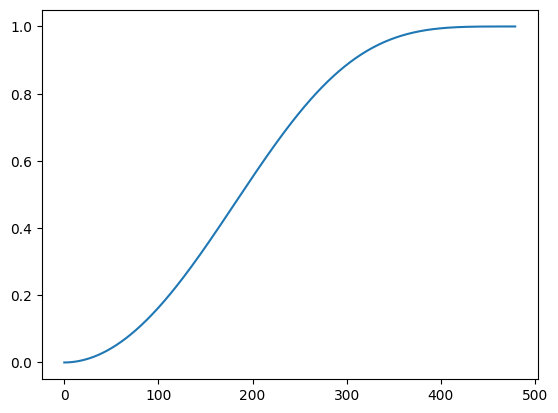

In [14]:
def RNNoise_window(win_length):
    x = np.arange(0, win_length)
    return np.sin(0.5 * np.pi *
                  np.sin(0.5 * np.pi * (x + 0.5) / win_length) ** 2)


RNNoise = RNNoise_window(480)
plt.plot(RNNoise)
plt.show()

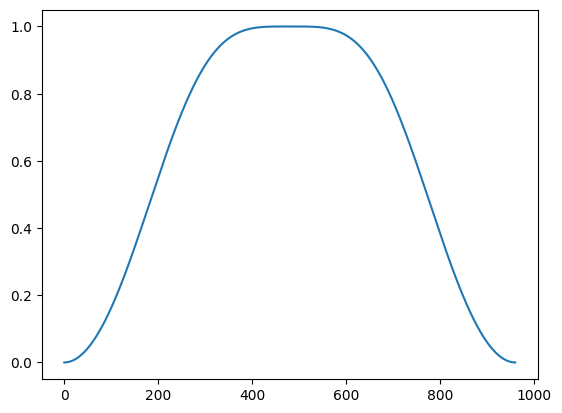

In [15]:
import matplotlib.pyplot as plt
import numpy as np
def RNNoise_window(win_length):
    x = np.arange(0, win_length)
    return np.sin(0.5 * np.pi *
                  np.sin(0.5 * np.pi * (x + 0.5) / win_length) ** 2)

FRAME_SIZE = 480
WINDOW_SIZE = 960
half_window = RNNoise_window(480)

def _apply_window(x):
    """Multiply input by sinosoidal function"""
    for i in range(FRAME_SIZE):
        x[i] *= half_window[i]
        x[WINDOW_SIZE - 1 - i] *= half_window[i]

    return x

RNNoise_window = np.concatenate([half_window,half_window[::-1]],axis=0)
plt.plot(RNNoise_window)
plt.show()